
Training the model with a hidden layer (50 units, ReLU)
Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8211 - loss: 0.6793 - val_accuracy: 0.8272 - val_loss: 0.5807
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8763 - loss: 0.5235 - val_accuracy: 0.8856 - val_loss: 0.5471
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8791 - loss: 0.5063 - val_accuracy: 0.8777 - val_loss: 0.5519
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8715 - loss: 0.5297 - val_accuracy: 0.8808 - val_loss: 0.5017
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8732 - loss: 0.5277 - val_accuracy: 0.8532 - val_loss: 0.5769
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8688 - loss: 0.5106 - val_accuracy: 0.8645 - val_loss: 0.6149
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8649 - loss: 0.5294 - val_accuracy: 0.8606 - val_loss: 0.5356
Epoch 8/20
1875/1875 ━━━━━━━━━━━━

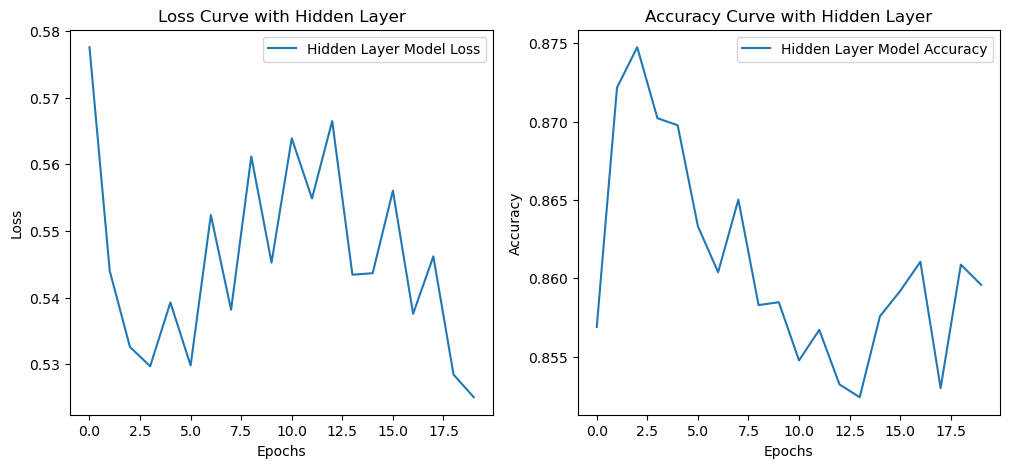

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

# Step 1: Load the digit dataset (MNIST)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the pixel values to [0, 1] range
x_train, x_test = x_train / 255.0, x_test / 255.0  

# Flatten images into 1D vectors (784 inputs)
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Step 2: Define the model with a hidden layer
model = keras.Sequential([
    layers.Dense(50, activation='relu', input_shape=(784,)),  # Hidden layer with 50 units
    layers.Dense(10, activation='softmax')  # Output layer (10 classes)
])

# Step 3: Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.05),
              loss='sparse_categorical_crossentropy',  # Since labels are integer class indices (0-9)
              metrics=['accuracy'])

# Step 4: Train for 20 epochs
print("\nTraining the model with a hidden layer (50 units, ReLU)")
history_hidden = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

# Step 5: Plot loss and accuracy comparison
plt.figure(figsize=(12, 5))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history_hidden.history['loss'], label="Hidden Layer Model Loss")
plt.title("Loss Curve with Hidden Layer")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history_hidden.history['accuracy'], label="Hidden Layer Model Accuracy")
plt.title("Accuracy Curve with Hidden Layer")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()
